# Qlik Analytics Tour - Predictive Analytics Demonstration

This demonstration is developed by Shiwanie Soebhag from Active Professionals for the purpose of demonstrating a Predictive Analytics model for the Qlik Analytics Tour. 

In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import statsmodels as sm

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


In [5]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15,6

In [11]:
variable_df = pd.read_excel("dataset.xlsx", header = 0,
                              names = ["date", "orders"],
                              index_col=0)


In [12]:
print(variable_df.head)

<bound method NDFrame.head of             orders
date              
11-05-2018    1065
12-05-2018     504
13-05-2018    1059
14-05-2018    1588
15-05-2018    2989
16-05-2018    1421
17-05-2018    1439
18-05-2018     941
19-05-2018       7
20-05-2018    1057
21-05-2018     794
22-05-2018    1565
23-05-2018    1270
24-05-2018    1290
25-05-2018    1567
26-05-2018     393
27-05-2018     858
28-05-2018    2047
29-05-2018    1451
30-05-2018     938
31-05-2018    1416
01-06-2018    1177
02-06-2018     333
03-06-2018    1396
04-06-2018    1976
05-06-2018    2492
06-06-2018    1787
07-06-2018    2715
08-06-2018    1241
09-06-2018     455
...            ...
23-01-2019     923
24-01-2019     873
25-01-2019     764
26-01-2019     414
27-01-2019     731
28-01-2019    1103
29-01-2019    1013
30-01-2019     891
31-01-2019    1212
01-02-2019     772
02-02-2019     313
03-02-2019     713
04-02-2019     931
05-02-2019    1843
06-02-2019    1295
07-02-2019    1421
08-02-2019    1124
09-02-2019     430
1

In [13]:
# Make timestamps out of the data, because this is needed
# For time-series forecasting


orders = pd.Series(variable_df["orders"].values,
                     index = pd.DatetimeIndex(data = (tuple(pd.date_range("05/11/2018",
                                                                          periods = 287,
                                                                          freq = "D"))),
                                              freq = "D"))
print(orders)

2018-05-11    1065
2018-05-12     504
2018-05-13    1059
2018-05-14    1588
2018-05-15    2989
2018-05-16    1421
2018-05-17    1439
2018-05-18     941
2018-05-19       7
2018-05-20    1057
2018-05-21     794
2018-05-22    1565
2018-05-23    1270
2018-05-24    1290
2018-05-25    1567
2018-05-26     393
2018-05-27     858
2018-05-28    2047
2018-05-29    1451
2018-05-30     938
2018-05-31    1416
2018-06-01    1177
2018-06-02     333
2018-06-03    1396
2018-06-04    1976
2018-06-05    2492
2018-06-06    1787
2018-06-07    2715
2018-06-08    1241
2018-06-09     455
              ... 
2019-01-23     923
2019-01-24     873
2019-01-25     764
2019-01-26     414
2019-01-27     731
2019-01-28    1103
2019-01-29    1013
2019-01-30     891
2019-01-31    1212
2019-02-01     772
2019-02-02     313
2019-02-03     713
2019-02-04     931
2019-02-05    1843
2019-02-06    1295
2019-02-07    1421
2019-02-08    1124
2019-02-09     430
2019-02-10     888
2019-02-11    1515
2019-02-12    1558
2019-02-13  

In [14]:
# Testen of er stationarity is met de Dickey Fuller Test

def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistics", "p-value", "#Lags Used",
                                   "Number of Observations Used"])

    print(df_output)

stationarity_test(orders)

Results of Dickey-Fuller Test:
Test Statistics                 -4.255882
p-value                          0.000529
#Lags Used                       9.000000
Number of Observations Used    277.000000
dtype: float64


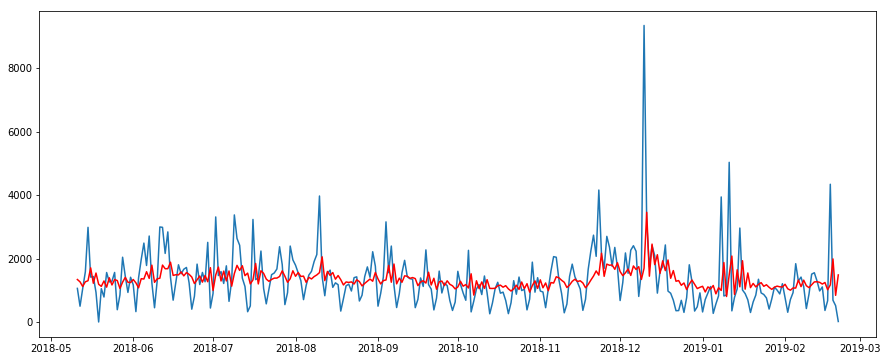

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

model = ARIMA(orders, order =(2,0,2))
results_AR = model.fit()
plt.plot(orders)
plt.plot(results_AR.fittedvalues, color="red")
plt.show()

In [16]:
# Model Diagnostics: Check the Model Quality Indicators
print(results_AR.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  287
Model:                     ARMA(2, 2)   Log Likelihood               -2348.104
Method:                       css-mle   S.D. of innovations            864.579
Date:                Mon, 03 Jun 2019   AIC                           4708.208
Time:                        16:16:31   BIC                           4730.165
Sample:                    05-11-2018   HQIC                          4717.008
                         - 02-21-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1345.0400    108.632     12.382      0.000    1132.125    1557.955
ar.L1.y        0.4205      0.340      1.236      0.218      -0.247       1.087
ar.L2.y        0.4519      0.290      1.558      0.1

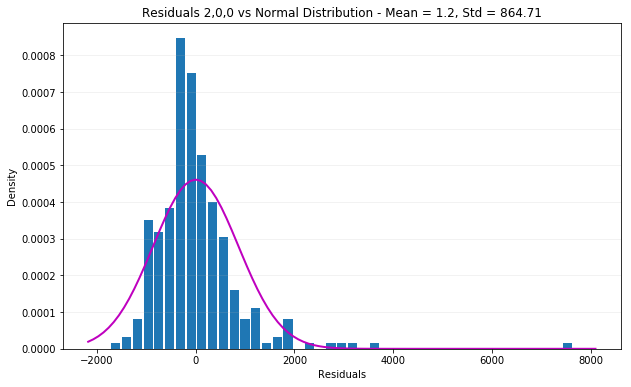

In [17]:
# Test for residuals. Residuals must not be autocorrelated.
# They need to show a normal distribution, vizualized with a histogram.

# Using ARIMA for the model, with the argument "order"
# It is easy to change parameters

from scipy.stats import norm

plt.figure(figsize = (10,6))
plt.hist(results_AR.resid, bins = "auto", density = True, rwidth = 0.85,
         label = "Residuals") #density TRUE = norm. dist line curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over
# a specifief interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, "m", linewidth = 2)
plt.grid(axis="y", alpha = 0.2)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residuals 2,0,0 vs Normal Distribution - Mean = "+str(round(mu,2))+", Std = "+str(round(std,2)))
plt.show()

2019-02-17     677
2019-02-18    4346
2019-02-19     692
2019-02-20     521
2019-02-21      22
Freq: D, dtype: int64
2019-02-17    1021.310813
2019-02-18    1175.407310
2019-02-19    1993.027317
2019-02-20     846.380156
2019-02-21    1489.012907
Freq: D, dtype: float64
2019-02-17    -344.310813
2019-02-18    3170.592690
2019-02-19   -1301.027317
2019-02-20    -325.380156
2019-02-21   -1467.012907
Freq: D, dtype: float64
1.1968151126330202


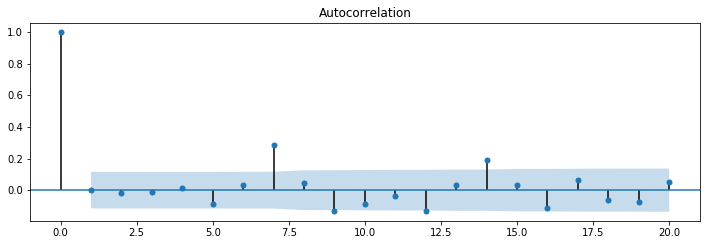

In [19]:
# Check the residuals
print(orders.tail())
print(results_AR.fittedvalues.tail())
print(results_AR.resid.tail())
print(np.mean(results_AR.resid))

# ACF plot of the residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)
plt.show()

# Predicting Future Values

In [21]:
modelAR4 = ARIMA(orders, order=(4,0,0))
results_AR4 = modelAR4.fit()
Fcast400 = results_AR4.predict(start = "22/02/2019",
                               end = "22/03/2019")


c:\users\ss01\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [23]:
model202 = ARIMA(orders, order=(2,0,2))
results_M202 = model202.fit()
Fcast202 = results_M202.predict(start = "22/02/2019",
                                end = "22/03/2019")

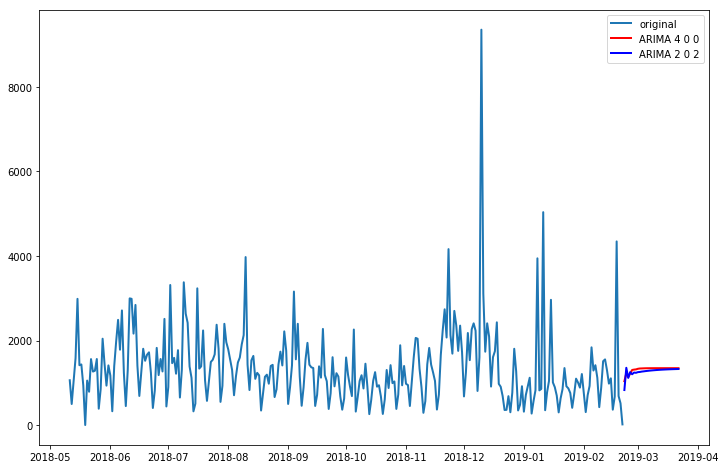

In [25]:
# Vizualising the forecasts
plt.figure(figsize = (12,8))
plt.plot(orders, linewidth = 2, label = "original")
plt.plot(Fcast400, color="red", linewidth = 2,
         label = "ARIMA 4 0 0")
plt.plot(Fcast202, color="blue", linewidth = 2,
         label = "ARIMA 2 0 2")
plt.legend()
plt.show()